In [1]:
# !pip install numpy
# !pip install scipy
# !pip install pandas
# !pip install statsmodels
# !pip install matplotlib
# !pip install seaborn

In [2]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas
import statsmodels.api as sm
import scipy
from statsmodels.formula.api import ols

In [3]:
dpath = (r"/Users/jquinnlee/Documents/HPC Arc Project/HPCArc")

# load in behavioral and Arc data as pandas dataframes
mwt_df = pd.read_csv(os.path.join(dpath, "HPC-Arc-MWT.csv"))
cfd_df = pd.read_csv(os.path.join(dpath, "HPC-Arc-CFD.csv"))


In [4]:
mwt_df

,Perfusion Group,Sex,Animal ID,Dummy Code,Day,Average latency (sec),Target quadrant dwelling (%),Non-target quadrant dwelling (%),dDG Arc:DAPI,vDG Arc:DAPI,dCA3 Arc:DAPI,vCA3 Arc:DAPI,dCA1 Arc:DAPI,vCA1 Arc:DAPI
0,CFD,M,2338-0,NaN,1,12.540,38.516746,20.494418,NaN,NaN,NaN,NaN,NaN,NaN
1,CFD,M,2338-1,NaN,1,18.430,36.733587,21.088804,NaN,NaN,NaN,NaN,NaN,NaN
2,CFD,M,2338-2,NaN,1,25.395,30.517818,23.160727,NaN,NaN,NaN,NaN,NaN,NaN
3,CFD,M,2339-0,NaN,1,36.855,28.625695,23.791435,NaN,NaN,NaN,NaN,NaN,NaN
4,CFD,M,2339-1,NaN,1,16.225,33.867488,22.044171,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,MWT,F,2340-1,23.0,4,5.230,56.405354,14.531549,0.056497,0.023346,0.137405,0.048148,0.198276,0.122066
92,MWT,F,2340-2,2.0,4,8.860,43.227991,18.924003,0.032338,0.042230,0.201920,0.073336,0.246032,0.111888
93,MWT,F,2341-0,22.0,4,5.350,45.981308,18.006231,0.041298,0.050505,0.046512,0.032086,0.364035,0.223629
94,MWT,F,2341-1,21.0,4,5.640,45.035461,18.321513,NaN,NaN,0.041667,0.027778,0.238342,0.125000


In [5]:
# create a subfolder for figures to save
if glob(os.path.join(dpath, "figures")) == []:
    os.mkdir("figures")

In [6]:
cols_stats=["Day", "Quadrant", "Dwelltime"]
cols_plots=["Day", "Quadrant", "Dwell-time (%)"]
mwt_dwell_percent_df_stats = pd.DataFrame(data=np.zeros([cfd_df.shape[0]*2, 3]) * np.nan, columns=cols_stats)
mwt_dwell_percent_df_plots = pd.DataFrame(data=np.zeros([cfd_df.shape[0]*2, 3]) * np.nan, columns=cols_plots)
c = 0
for row in range(cfd_df.shape[0]):
    for col in ["Target quadrant dwelling (%)", "Non-target quadrant dwelling (%)"]:
        if col == "Target quadrant dwelling (%)":
            col_name = 1
        elif col == "Non-target quadrant dwelling (%)":
            col_name = 0
        mwt_dwell_percent_df_stats.iloc[c] = np.hstack((mwt_df["Day"].iloc[row], col_name, mwt_df[col].iloc[row]))
        if col == "Target quadrant dwelling (%)":
            col_name = "Target"
        elif col == "Non-target quadrant dwelling (%)":
            col_name = "Non-target"
        mwt_dwell_percent_df_plots.iloc[c] = np.hstack((mwt_df["Day"].iloc[row], col_name, mwt_df[col].iloc[row]))
        
        
        c+=1
mwt_dwell_percent_df_stats.iloc[:, -1] = mwt_dwell_percent_df_stats.iloc[:, -1].astype(float)
mwt_dwell_percent_df_plots.iloc[:, -1] = mwt_dwell_percent_df_plots.iloc[:, -1].astype(float)


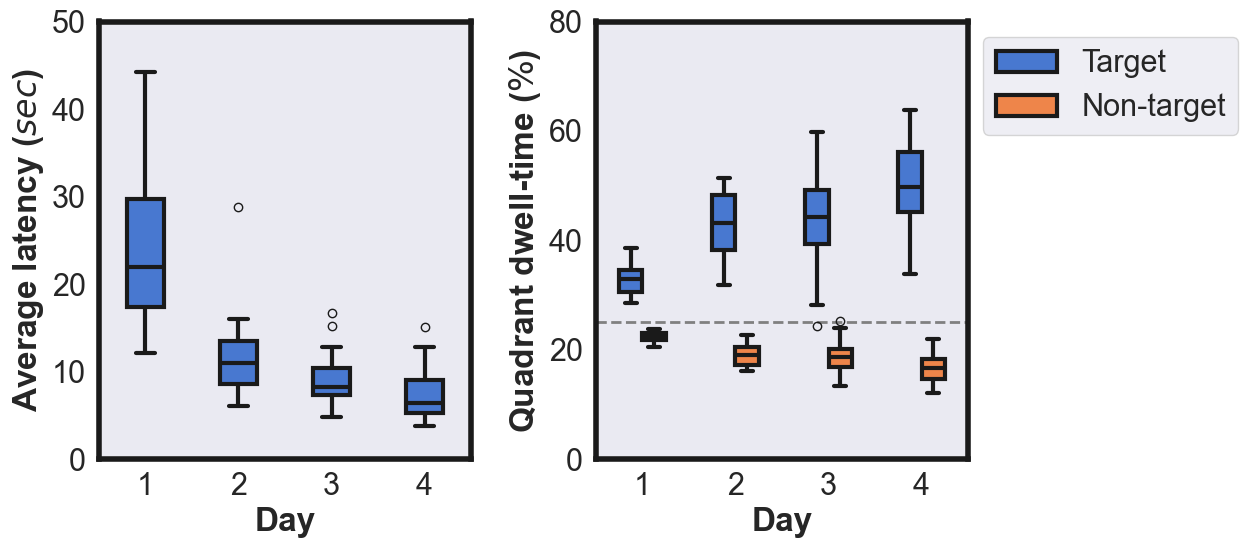

In [7]:
# visualize morris water task behavioural data
sns.set(style="dark", font_scale=2., palette="muted")
fig = plt.figure(figsize=(13, 6))
ax1 = plt.subplot(121)
sns.boxplot(data=mwt_df, x="Day", y="Average latency (sec)", legend=None, zorder=1., notch=False, width=.4, linewidth=3., 
            linecolor="k", whis=1.5, saturation=1.)
ax1.set_ylim([0, 50])
ax1.set_ylabel("Average latency ($sec$)", weight="bold")
ax1.set_xlabel("Day", weight="bold")
plt.setp(ax1.spines.values(), linewidth=4., color="k")
ax2 = plt.subplot(122)
sns.boxplot(data=mwt_dwell_percent_df_plots, x="Day", y="Dwell-time (%)", hue="Quadrant",
            zorder=1., notch=False, width=.5, linewidth=3., saturation=1.,
            linecolor="k", whis=1.5)
ax2.set_ylim([0, 80])
ax2.set_ylabel("Quadrant dwell-time ($\%$)", weight="bold")
ax2.set_xlabel("Day", weight="bold")
ax2.axhline(25, linewidth=2., linestyle="--", color="gray", zorder=0)
plt.legend(bbox_to_anchor=(1,1))
plt.setp(ax2.spines.values(), linewidth=4., color="k")
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(dpath, "figures", "MWT_behaviour.svg"))
fig.savefig(os.path.join(dpath, "figures", "MWT_behaviour.png"), dpi=300)


In [8]:
# Linear regression for average latency vs day
scipy.stats.linregress(mwt_df["Average latency (sec)"], mwt_df["Day"])

LinregressResult(slope=-0.08623792647140109, intercept=3.6391311437484823, rvalue=-0.6886510901036287, pvalue=8.87855953495985e-15, stderr=0.009365452740388473, intercept_stderr=0.149317132781877)

In [9]:
# Two-way ANOVA with day and Quadrant as factors
formula = 'Dwelltime ~ C(Day) + C(Quadrant) + C(Day):C(Quadrant)'
lm = smf.ols(formula, mwt_dwell_percent_df_stats).fit()
print(sm.stats.anova_lm(lm))

                      df        sum_sq       mean_sq           F        PR(>F)
C(Day)               3.0    397.532781    132.510927    4.045684  9.598697e-03
C(Quadrant)          1.0  12722.568285  12722.568285  388.432074  4.976400e-34
C(Day):C(Quadrant)   3.0   1590.131125    530.043708   16.182737  1.846934e-08
Residual            88.0   2882.321218     32.753650         NaN           NaN


In [10]:
scipy.stats.ttest_rel(a=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Day"]==4, mwt_dwell_percent_df_stats["Quadrant"]==0)],
                      b=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Day"]==4, mwt_dwell_percent_df_stats["Quadrant"]==0)])

TtestResult(statistic=nan, pvalue=nan, df=11)

In [11]:
a=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Quadrant"]==0, mwt_dwell_percent_df_stats["Day"]==1)]
b=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Quadrant"]==1, mwt_dwell_percent_df_stats["Day"]==1)]
print(f"Day 1\n{scipy.stats.ttest_rel(b, a)}")

a=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Quadrant"]==0, mwt_dwell_percent_df_stats["Day"]==2)]
b=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Quadrant"]==1, mwt_dwell_percent_df_stats["Day"]==2)]
print(f"Day 2\n{scipy.stats.ttest_rel(b, a)}")

a=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Quadrant"]==0, mwt_dwell_percent_df_stats["Day"]==3)]
b=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Quadrant"]==1, mwt_dwell_percent_df_stats["Day"]==3)]
print(f"Day 3\n{scipy.stats.ttest_rel(b, a)}")


a=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Quadrant"]==0, mwt_dwell_percent_df_stats["Day"]==4)]
b=mwt_dwell_percent_df_stats["Dwelltime"][np.logical_and(mwt_dwell_percent_df_stats["Quadrant"]==1, mwt_dwell_percent_df_stats["Day"]==4)]
print(f"Day 4\n{scipy.stats.ttest_rel(b, a)}")

Day 1
TtestResult(statistic=9.485032477974688, pvalue=1.2506299440255035e-06, df=11)
Day 2
TtestResult(statistic=9.723376577740773, pvalue=9.777877522959489e-07, df=11)
Day 3
TtestResult(statistic=6.274220297693257, pvalue=6.051495927082839e-05, df=11)
Day 4
TtestResult(statistic=9.365340915038237, pvalue=1.4178102947990721e-06, df=11)


In [12]:
cfd_df.head()

,Perfusion Group,Sex,Animal ID,Dummy Code,Day,Paired dwell time (sec),Unpaired dwell time (sec),Paired dwell time (%),Unpaired dwell time (%),dDG Arc:DAPI,vDG Arc:DAPI,dCA3 Arc:DAPI,vCA3 Arc:DAPI,dCA1 Arc:DAPI,vCA1 Arc:DAPI
0,MWT,F,2340-2,NaN,Pre-exposure,206,187,52.417303,47.582697,NaN,NaN,NaN,NaN,NaN,NaN
1,MWT,F,2340-1,NaN,Pre-exposure,170,263,39.260970,60.739030,NaN,NaN,NaN,NaN,NaN,NaN
2,MWT,F,2340-0,NaN,Pre-exposure,258,226,53.305785,46.694215,NaN,NaN,NaN,NaN,NaN,NaN
3,MWT,F,2341-2,NaN,Pre-exposure,234,208,52.941176,47.058824,NaN,NaN,NaN,NaN,NaN,NaN
4,MWT,F,2341-1,NaN,Pre-exposure,268,147,64.578313,35.421687,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# format context dwell time data for CFD to be compatible with seaborn plotting functions
cols_plots=["Day", "Context", "Dwell-time (sec)"]
cols_stats=["Day", "Context", "Dwelltime"]

cfd_dwell_time_df_plots = pd.DataFrame(data=np.zeros([cfd_df.shape[0]*2, 3]) * np.nan, columns=cols_plots)
cfd_dwell_time_df_stats = pd.DataFrame(data=np.zeros([cfd_df.shape[0]*2, 3]) * np.nan, columns=cols_stats)


c = 0
for row in range(cfd_df.shape[0]):
    for col in ["Paired dwell time (sec)", "Unpaired dwell time (sec)"]:
        if col == "Paired dwell time (sec)":
            col_name = "Paired"
        elif col == "Unpaired dwell time (sec)":
            col_name = "Unpaired"
        cfd_dwell_time_df_plots.iloc[c] = np.hstack((cfd_df["Day"].iloc[row], col_name, cfd_df[col].iloc[row]))
        if col == "Paired dwell time (sec)":
            col_name = 1
        elif col == "Unpaired dwell time (sec)":
            col_name = 0
        if cfd_df["Day"].iloc[row] == "Pre-exposure":
            day = 1
        elif cfd_df["Day"].iloc[row] == "Preference test":
            day = 2
        cfd_dwell_time_df_stats.iloc[c] = np.hstack((day, col_name, cfd_df[col].iloc[row]))
        c+=1
cfd_dwell_time_df_plots.iloc[:, -1] = cfd_dwell_time_df_plots.iloc[:, -1].astype(float)
cfd_dwell_time_df_stats.iloc[:, -1] = cfd_dwell_time_df_stats.iloc[:, -1].astype(float)


cols_plots=["Day", "Context", "Dwell-time (%)"]
cfd_dwell_percent_df_plots = pd.DataFrame(data=np.zeros([cfd_df.shape[0]*2, 3]) * np.nan, columns=cols_plots)
cfd_dwell_percent_df_stats = pd.DataFrame(data=np.zeros([cfd_df.shape[0]*2, 3]) * np.nan, columns=cols_stats)

c = 0
for row in range(cfd_df.shape[0]):
    for col in ["Paired dwell time (%)", "Unpaired dwell time (%)"]:
        if col == "Paired dwell time (%)":
            col_name = "Paired"
        elif col == "Unpaired dwell time (%)":
            col_name = "Unpaired"
        cfd_dwell_percent_df_plots.iloc[c] = np.hstack((cfd_df["Day"].iloc[row], col_name, cfd_df[col].iloc[row]))
        if col == "Paired dwell time (%)":
            col_name = 1
        elif col == "Unpaired dwell time (%)":
            col_name = 0
        if cfd_df["Day"].iloc[row] == "Pre-exposure":
            day = 1
        elif cfd_df["Day"].iloc[row] == "Preference test":
            day = 2
        cfd_dwell_percent_df_stats.iloc[c] = np.hstack((day, col_name, cfd_df[col].iloc[row]))
        c+=1
cfd_dwell_percent_df_plots.iloc[:, -1] = cfd_dwell_percent_df_plots.iloc[:, -1].astype(float)
cfd_dwell_percent_df_stats.iloc[:, -1] = cfd_dwell_percent_df_stats.iloc[:, -1].astype(float)


/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/2863090039.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Pre-exposure", "Preference\ntest"])
/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/2863090039.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["Pre-exposure", "Preference\ntest"])


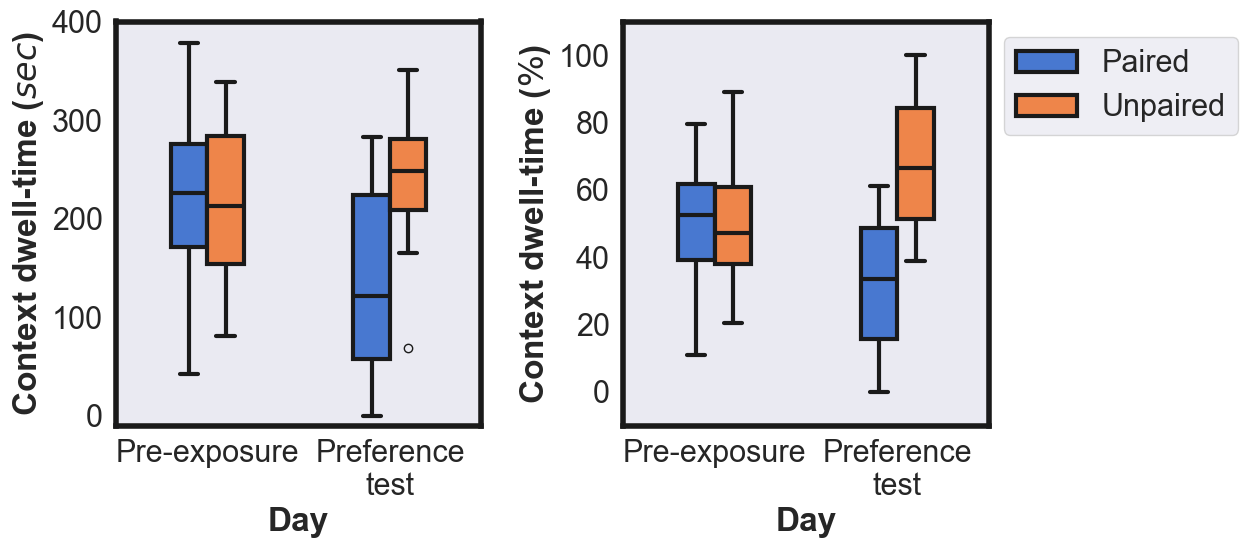

In [14]:
# visualize contextual fear discrimination behavioural data
sns.set(style="dark", font_scale=2., palette="muted")
fig = plt.figure(figsize=(13, 6))
ax1 = plt.subplot(121)
sns.boxplot(data=cfd_dwell_time_df_plots, x="Day", y="Dwell-time (sec)", hue="Context", 
            zorder=1., notch=False, width=.4, linewidth=3., legend=None, saturation=1,
            linecolor="k", whis=1.5)
ax1.set_ylim([-10, 400])
ax1.set_ylabel("Context dwell-time ($sec$)", weight="bold")
ax1.set_xlabel("Day", weight="bold")
ax1.set_xticklabels(["Pre-exposure", "Preference\ntest"])
plt.setp(ax1.spines.values(), linewidth=4., color="k")
ax2 = plt.subplot(122)
sns.boxplot(data=cfd_dwell_percent_df_plots, x="Day", y="Dwell-time (%)", hue="Context",
            zorder=1., notch=False, width=.4, linewidth=3., saturation=1,
            linecolor="k", whis=1.5)
ax2.set_ylim([-10, 110])
ax2.set_ylabel("Context dwell-time ($\%$)", weight="bold")
ax2.set_xlabel("Day", weight="bold")
ax2.set_xticklabels(["Pre-exposure", "Preference\ntest"])
plt.legend(bbox_to_anchor=(1,1))
plt.setp(ax2.spines.values(), linewidth=4., color="k")
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(dpath, "figures", "CFD_behaviour.svg"))
fig.savefig(os.path.join(dpath, "figures", "CFD_behaviour.png"), dpi=300)

In [15]:
# Two-way ANOVA with day and Quadrant as factors
formula = 'Dwelltime ~ C(Day) + C(Context) + C(Day):C(Context)'
lm = smf.ols(formula, cfd_dwell_time_df_stats).fit()
print(f"Dwell-time\n{sm.stats.anova_lm(lm)}\n")

lm = smf.ols(formula, cfd_dwell_percent_df_stats).fit()
print(f"Percent dwell-time\n{sm.stats.anova_lm(lm)}\n")


Dwell-time
                     df         sum_sq       mean_sq          F    PR(>F)
C(Day)              1.0   26867.041667  26867.041667   4.584988  0.034896
C(Context)          1.0   59700.375000  59700.375000  10.188152  0.001935
C(Day):C(Context)   1.0   80852.041667  80852.041667  13.797784  0.000349
Residual           92.0  539100.166667   5859.784420        NaN       NaN

Percent dwell-time
                     df        sum_sq       mean_sq             F    PR(>F)
C(Day)              1.0  1.041773e-20  1.041773e-20  3.149663e-23  1.000000
C(Context)          1.0  7.178057e+03  7.178057e+03  2.170192e+01  0.000011
C(Day):C(Context)   1.0  8.667702e+03  8.667702e+03  2.620566e+01  0.000002
Residual           92.0  3.042963e+04  3.307569e+02           NaN       NaN


In [16]:
print("Dwell time (sec) repeated samples t-test")
a=cfd_dwell_time_df_stats["Dwelltime"][np.logical_and(cfd_dwell_time_df_stats["Context"]==0, cfd_dwell_time_df_stats["Day"]==1)]
b=cfd_dwell_time_df_stats["Dwelltime"][np.logical_and(cfd_dwell_time_df_stats["Context"]==1, cfd_dwell_time_df_stats["Day"]==1)]
print(f"Pre-Exposure\n{scipy.stats.ttest_rel(b, a)}")

a=cfd_dwell_time_df_stats["Dwelltime"][np.logical_and(cfd_dwell_time_df_stats["Context"]==0, cfd_dwell_time_df_stats["Day"]==2)]
b=cfd_dwell_time_df_stats["Dwelltime"][np.logical_and(cfd_dwell_time_df_stats["Context"]==1, cfd_dwell_time_df_stats["Day"]==2)]
print(f"Preference Test\n{scipy.stats.ttest_rel(b, a)}")

print("Dwell time (%) repeated samples t-test")
a=cfd_dwell_percent_df_stats["Dwelltime"][np.logical_and(cfd_dwell_percent_df_stats["Context"]==0, cfd_dwell_percent_df_stats["Day"]==1)]
b=cfd_dwell_percent_df_stats["Dwelltime"][np.logical_and(cfd_dwell_percent_df_stats["Context"]==1, cfd_dwell_percent_df_stats["Day"]==1)]
print(f"Pre-Exposure\n{scipy.stats.ttest_rel(b, a)}")

a=cfd_dwell_percent_df_stats["Dwelltime"][np.logical_and(cfd_dwell_percent_df_stats["Context"]==0, cfd_dwell_percent_df_stats["Day"]==2)]
b=cfd_dwell_percent_df_stats["Dwelltime"][np.logical_and(cfd_dwell_percent_df_stats["Context"]==1, cfd_dwell_percent_df_stats["Day"]==2)]
print(f"Preference Test\n{scipy.stats.ttest_rel(b, a)}")

Dwell time (sec) repeated samples t-test
Pre-Exposure
TtestResult(statistic=0.28030997983418465, pvalue=0.7817454952657039, df=23)
Preference Test
TtestResult(statistic=-4.3036020912488455, pvalue=0.0002641914663356015, df=23)
Dwell time (%) repeated samples t-test
Pre-Exposure
TtestResult(statistic=0.2533287267985172, pvalue=0.8022648626305413, df=23)
Preference Test
TtestResult(statistic=-4.513004588589372, pvalue=0.00015670397264062782, df=23)


In [17]:
mwt_df

,Perfusion Group,Sex,Animal ID,Dummy Code,Day,Average latency (sec),Target quadrant dwelling (%),Non-target quadrant dwelling (%),dDG Arc:DAPI,vDG Arc:DAPI,dCA3 Arc:DAPI,vCA3 Arc:DAPI,dCA1 Arc:DAPI,vCA1 Arc:DAPI
0,CFD,M,2338-0,NaN,1,12.540,38.516746,20.494418,NaN,NaN,NaN,NaN,NaN,NaN
1,CFD,M,2338-1,NaN,1,18.430,36.733587,21.088804,NaN,NaN,NaN,NaN,NaN,NaN
2,CFD,M,2338-2,NaN,1,25.395,30.517818,23.160727,NaN,NaN,NaN,NaN,NaN,NaN
3,CFD,M,2339-0,NaN,1,36.855,28.625695,23.791435,NaN,NaN,NaN,NaN,NaN,NaN
4,CFD,M,2339-1,NaN,1,16.225,33.867488,22.044171,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,MWT,F,2340-1,23.0,4,5.230,56.405354,14.531549,0.056497,0.023346,0.137405,0.048148,0.198276,0.122066
92,MWT,F,2340-2,2.0,4,8.860,43.227991,18.924003,0.032338,0.042230,0.201920,0.073336,0.246032,0.111888
93,MWT,F,2341-0,22.0,4,5.350,45.981308,18.006231,0.041298,0.050505,0.046512,0.032086,0.364035,0.223629
94,MWT,F,2341-1,21.0,4,5.640,45.035461,18.321513,NaN,NaN,0.041667,0.027778,0.238342,0.125000


In [18]:
# load in just IEG labels
labels_df = pd.read_csv(os.path.join(dpath, "HPC-Arc-Labels.csv"))
labels_df.columns = (["ID", "Sex", "Group", "Axis", "Region", "Sparsity"])
labels_df

,ID,Sex,Group,Axis,Region,Sparsity
0,DC1,F,MWT,Dorsal,CA1,0.221311
1,DC2,F,MWT,Dorsal,CA1,0.246032
2,DC3,M,CFD,Dorsal,CA1,0.297753
3,DC4,M,MWT,Dorsal,CA1,0.245902
4,DC5,M,CFD,Dorsal,CA1,0.269231
...,...,...,...,...,...,...
139,DC20,F,CFD,Ventral,DG,0.070313
140,DC21,F,MWT,Ventral,DG,NaN
141,DC22,F,MWT,Ventral,DG,0.050505
142,DC23,F,MWT,Ventral,DG,0.023346


/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/3281641378.py:5: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'k'}` instead.

  sns.barplot(data=labels_df[labels_df['Group']=='MWT'], capsize=0.15,
/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/3281641378.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 4}` instead.

  sns.barplot(data=labels_df[labels_df['Group']=='MWT'], capsize=0.15,
/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/3281641378.py:17: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'k'}` instead.

  sns.barplot(data=labels_df[labels_df['Group']=='CFD'], capsize=0.15,
/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/3281641378.py:17: FutureWarning: 

The `errwidth` parameter is deprecated. And will be

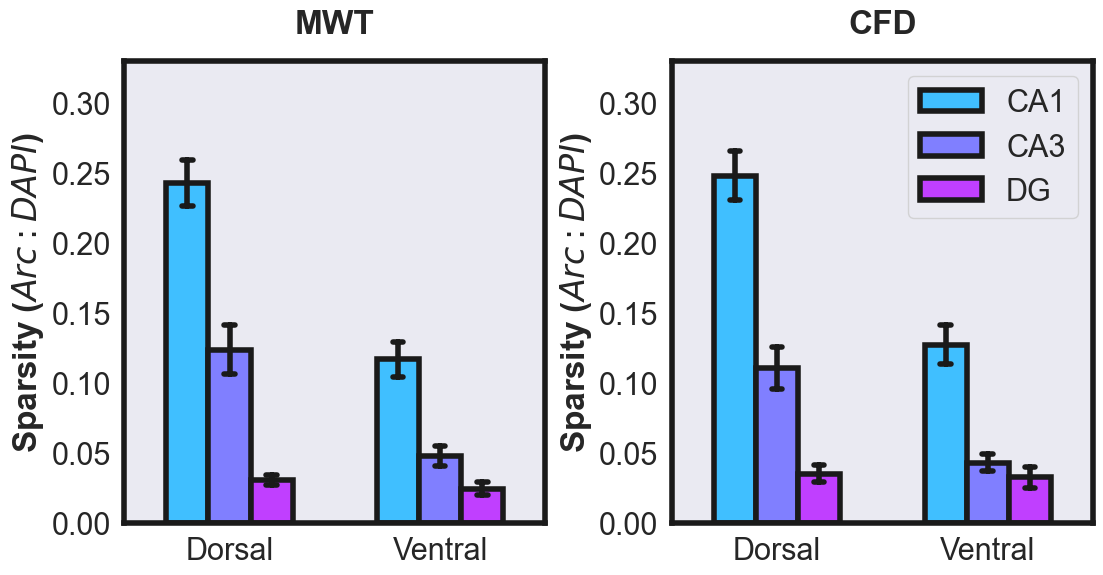



                               df    sum_sq   mean_sq           F  \
C(Group)                      1.0  0.000018  0.000018    0.011137   
C(Region)                     2.0  0.572986  0.286493  172.982807   
C(Axis)                       1.0  0.158022  0.158022   95.412771   
C(Axis):C(Region)             2.0  0.083311  0.041655   25.151308   
C(Axis):C(Group)              1.0  0.000302  0.000302    0.182505   
C(Group):C(Region)            2.0  0.002023  0.001012    0.610833   
C(Group):C(Axis):C(Region)    2.0  0.000033  0.000016    0.009925   
Residual                    128.0  0.211993  0.001656         NaN   

                                  PR(>F)  
C(Group)                    9.161171e-01  
C(Region)                   4.108096e-37  
C(Axis)                     3.518768e-17  
C(Axis):C(Region)           6.128359e-10  
C(Axis):C(Group)            6.699474e-01  
C(Group):C(Region)          5.444732e-01  
C(Group):C(Axis):C(Region)  9.901251e-01  
Residual                        

/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/3281641378.py:43: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'k'}` instead.

  sns.barplot(data=labels_df, x='Region', y='Sparsity', hue='Axis', width=0.6,
/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/3281641378.py:43: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 4.0}` instead.

  sns.barplot(data=labels_df, x='Region', y='Sparsity', hue='Axis', width=0.6,


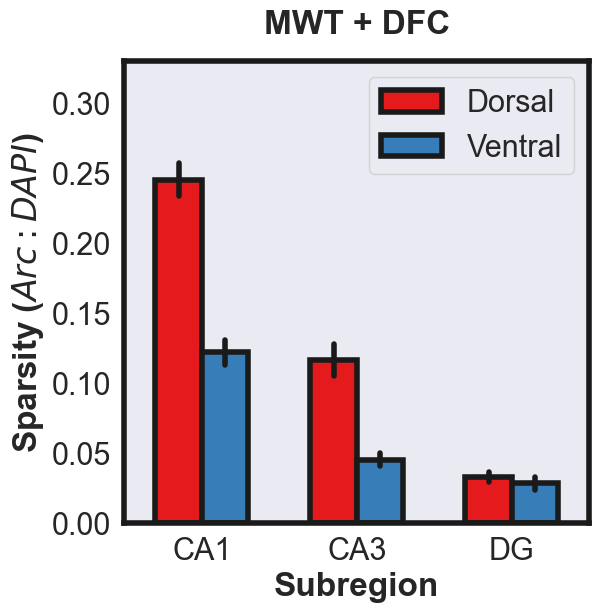



                      df    sum_sq   mean_sq           F        PR(>F)
C(Region)            2.0  0.572894  0.286447  178.977618  1.435513e-38
C(Axis)              1.0  0.158022  0.158022   98.735246  9.032270e-18
C(Axis):C(Region)    2.0  0.083311  0.041655   26.027130  2.819467e-10
Residual           134.0  0.214462  0.001600         NaN           NaN


DG: t=1.2128846409702156, p=0.2380373110226565
 CA3: t=6.605160138333753, p=1.214483025167149e-06
 CA1: t=9.270460584060812, p=3.1294001718793143e-09


DG vs CA3: t=-5.769536513166027, p=6.856313255883882e-07
 CA3 vs CA1: t=-10.835432192910854, p=3.968267043006933e-14
 DG vs CA1: t=-12.982320276569537, p=8.050891662498913e-17


In [19]:
# Visualize recruitment results across regions and tasks, and statistics
sns.set(style="dark", font_scale=2.)
fig = plt.figure(figsize=(12.5, 6))
ax = plt.subplot(121)
sns.barplot(data=labels_df[labels_df['Group']=='MWT'], capsize=0.15,
            x='Axis', y='Sparsity', hue='Region', width=0.6, errwidth=4,
            linewidth=4, edgecolor='k', palette='cool', errorbar="se", saturation=1.,
            errcolor="k")
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Sparsity ($Arc:DAPI$)', weight='bold')
plt.xlabel("")
plt.legend([],[], frameon=False)
plt.title('MWT', fontsize=24, weight='bold', pad=20)
ax.set_ylim([.0, .33])
plt.setp(ax.spines.values(), linewidth=4, color="k")
ax = plt.subplot(122)
sns.barplot(data=labels_df[labels_df['Group']=='CFD'], capsize=0.15,
            x='Axis', y='Sparsity', hue='Region', width=0.6, errwidth=4,
            linewidth=4, edgecolor='k', palette='cool', errorbar="se", saturation=1.,
            errcolor="k")
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Sparsity ($Arc:DAPI$)', weight='bold')
plt.xlabel("")
plt.title('CFD', fontsize=24, weight='bold', pad=20)
ax.set_ylim([.0, .33])
plt.setp(ax.spines.values(), linewidth=4, color="k")
plt.subplots_adjust(wspace=.3, hspace=.5)
plt.show()
fig.savefig(os.path.join(dpath, "figures", "MWT_CFD_Sparsity.svg"))
fig.savefig(os.path.join(dpath, "figures", "MWT_CFD_Sparsity.png"), dpi=300)


print('\n')
labels_df.dropna(axis=0, inplace=True)
formula = 'Sparsity ~ C(Group) + C(Region) + C(Axis) + C(Axis):C(Region) + '\
          'C(Axis):C(Group) + C(Group):C(Region) + C(Group):C(Axis):C(Region)'
lm = smf.ols(formula, labels_df).fit()
print(sm.stats.anova_lm(lm))

## Given no effect of group, combine the data and re-analyze
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.barplot(data=labels_df, x='Region', y='Sparsity', hue='Axis', width=0.6,
            linewidth=4, edgecolor='k', palette='Set1', errorbar="se",
            errcolor="k", errwidth=4., saturation=1)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Sparsity ($Arc:DAPI$)", weight="bold")
plt.xlabel("Subregion", weight="bold")
plt.title("MWT + DFC", fontsize=24, weight="bold", pad=20)
ax.set_ylim([.0, .33])
plt.setp(ax.spines.values(), linewidth=4, color="k")
plt.show()
fig.savefig(os.path.join(dpath, "figures", "Combined_Sparsity.svg"))
fig.savefig(os.path.join(dpath, "figures", "Combined_Sparsity.png"), dpi=300)


print('\n')

labels_df.dropna(axis=0, inplace=True)
formula = 'Sparsity ~ C(Region) + C(Axis) + C(Axis):C(Region)'
lm = smf.ols(formula, labels_df).fit()
print(sm.stats.anova_lm(lm))


CA1_ttest = scipy.stats.ttest_rel(labels_df["Sparsity"][
                                      np.logical_and(labels_df["Region"]=="CA1",
                                                     labels_df["Axis"]=="Dorsal")],
                                  labels_df["Sparsity"][
                                      np.logical_and(labels_df["Region"]=="CA1",
                                                     labels_df["Axis"]=="Ventral")])

CA3_ttest = scipy.stats.ttest_rel(labels_df["Sparsity"][
                                      np.logical_and(labels_df["Region"]=="CA3",
                                                     labels_df["Axis"]=="Dorsal")],
                                  labels_df["Sparsity"][
                                      np.logical_and(labels_df["Region"]=="CA3",
                                                     labels_df["Axis"]=="Ventral")])

DG_ttest = scipy.stats.ttest_rel(labels_df["Sparsity"][
                                     np.logical_and(labels_df["Region"]=="DG",
                                                     labels_df["Axis"]=="Dorsal")],
                                  labels_df["Sparsity"][
                                      np.logical_and(labels_df["Region"]=="DG",
                                                     labels_df["Axis"]=="Ventral")])
print("\n")
print(f"DG: t={DG_ttest[0]}, p={DG_ttest[1]}\n CA3: t={CA3_ttest[0]}, p={CA3_ttest[1]}\n CA1: t={CA1_ttest[0]}, p={CA1_ttest[1]}")


DGCA3_ttest = scipy.stats.ttest_rel(labels_df["Sparsity"][labels_df["Region"]=="DG"],
                                  labels_df["Sparsity"][labels_df["Region"]=="CA3"])

CA3CA1_ttest = scipy.stats.ttest_rel(labels_df["Sparsity"][labels_df["Region"]=="CA3"],
                                  labels_df["Sparsity"][np.logical_and(labels_df["Region"]=="CA1", labels_df["ID"] != "DC18")])

DGCA1_ttest = scipy.stats.ttest_rel(labels_df["Sparsity"][labels_df["Region"]=="DG"],
                                  labels_df["Sparsity"][np.logical_and(labels_df["Region"]=="CA1", labels_df["ID"] != "DC18")])
print("\n")
print(f"DG vs CA3: t={DGCA3_ttest[0]}, p={DGCA3_ttest[1]}\n CA3 vs CA1: t={CA3CA1_ttest[0]}, p={CA3CA1_ttest[1]}\n DG vs CA1: t={DGCA1_ttest[0]}, p={DGCA1_ttest[1]}")

In [20]:
animals, groups, regions, poles = labels_df["ID"].unique(), labels_df["Group"].unique(), \
                                  labels_df["Region"].unique(), labels_df["Axis"].unique()


df_mwt = labels_df[labels_df["Group"]=="MWT"]
df_cfd = labels_df[labels_df["Group"]=="CFD"]

rs, ps = np.meshgrid(regions, poles)
regions_poles = np.dstack((rs, ps)).reshape(-1, 2)
rsm_mwt = np.zeros([regions_poles.shape[0],
                    regions_poles.shape[0]]) * np.nan
rsm_cfd = np.zeros_like(rsm_mwt) * np.nan

for i, (region1, pole1) in enumerate(regions_poles):
  for j, (region2, pole2) in enumerate(regions_poles):
    if i != j:
      r1_recruitment = df_mwt[np.logical_and(df_mwt["Axis"] == pole1,
                                            df_mwt["Region"] == region1)][
                                                "Sparsity"].to_numpy()
      r2_recruitment = df_mwt[np.logical_and(df_mwt["Axis"] == pole2,
                                            df_mwt["Region"] == region2)][
                                                "Sparsity"].to_numpy()
      rsm_mwt[i, j] = np.abs(r2_recruitment.mean() - r1_recruitment.mean())
for i, (region1, pole1) in enumerate(regions_poles):
  for j, (region2, pole2) in enumerate(regions_poles):
    if i != j:
      r1_recruitment = df_cfd[np.logical_and(df_cfd["Axis"] == pole1,
                                             df_cfd["Region"] == region1)][
                                                "Sparsity"].to_numpy()
      r2_recruitment = df_cfd[np.logical_and(df_cfd["Axis"] == pole2,
                                             df_cfd["Region"] == region2)][
                                                "Sparsity"].to_numpy()
      rsm_cfd[i, j] = np.abs(r2_recruitment.mean() - r1_recruitment.mean())


In [21]:
regions_poles
regions_poles_names= np.array(["dCA1", "dCA3", "dDG", "vCA1", "vCA3", "vDG"])

In [22]:
# measure sparsity similarity in the rdms across tasks, and with shuffled rdms
from scipy.stats import kendalltau
similarity_score = kendalltau(rsm_mwt[np.tri(rsm_mwt.shape[0], k=-1).astype(bool)],
                              rsm_cfd[np.tri(rsm_cfd.shape[0], k=-1).astype(bool)])[0]
n_sims = 100
np.random.seed(2024)
shuffle_scores = np.zeros(n_sims)
shuffle_ps = np.zeros(n_sims)
for k in range(n_sims):
    shuffle_scores[k], shuffle_ps[k] = kendalltau(np.random.permutation(rsm_mwt[np.tri(rsm_mwt.shape[0], k=-1).astype(bool)]),
                                 np.random.permutation(rsm_cfd[np.tri(rsm_cfd.shape[0], k=-1).astype(bool)]))


In [23]:
kendalltau(rsm_mwt[np.tri(rsm_mwt.shape[0], k=-1).astype(bool)],
                              rsm_cfd[np.tri(rsm_cfd.shape[0], k=-1).astype(bool)])

print(shuffle_scores.mean())
print(shuffle_ps.mean())

0.030857142857142857
0.4776078321122374


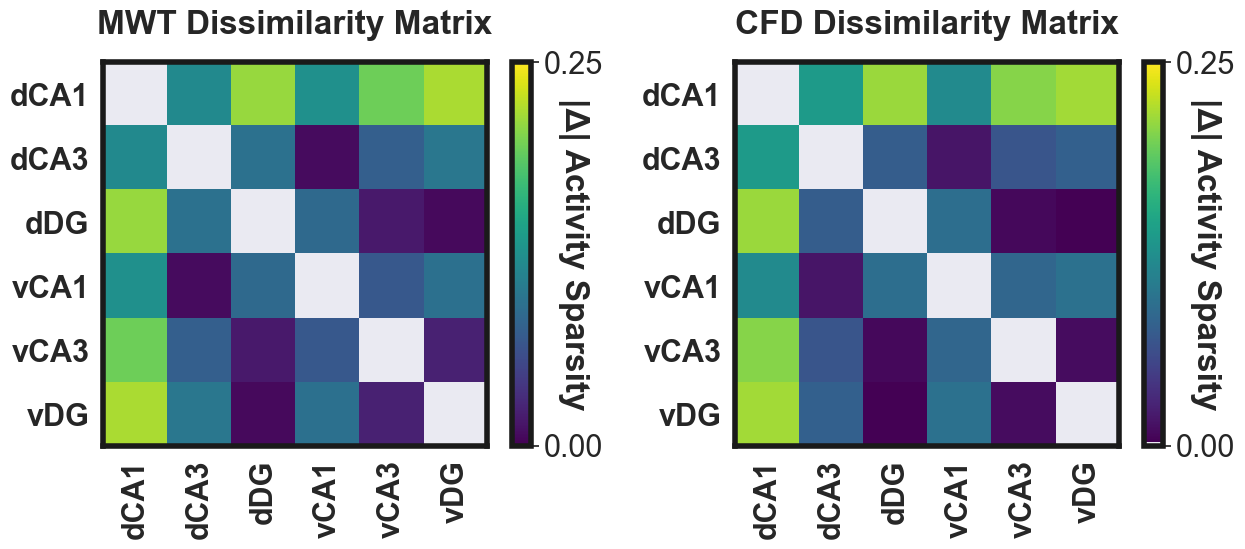

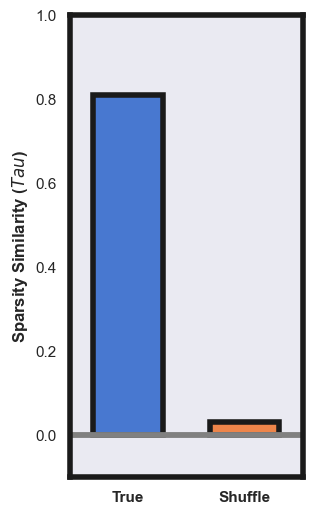

In [24]:
sns.set(style="dark", font_scale=2.)
fig = plt.figure(figsize=(13, 6))
ax1, ax2 = plt.subplot(121), plt.subplot(122)
mappable = ax1.imshow(rsm_mwt, cmap="viridis",
                      vmax=.25, vmin=0.,
                      origin="upper")
ax1.set_title("MWT Dissimilarity Matrix", weight="bold", pad=20)

ax1.set_yticks(np.arange(regions_poles.shape[0]))
ax1.set_yticklabels(regions_poles_names, weight="bold")

ax1.set_xticks(np.arange(regions_poles.shape[0]))
ax1.set_xticklabels(regions_poles_names, rotation=90, weight="bold")
plt.setp(ax1.spines.values(), color="k", linewidth=4.)

cbar = plt.colorbar(mappable, shrink=.8)
cbar.ax.set_ylim([0, .25])
cbar.ax.set_ylabel(u"|Δ| Activity Sparsity", rotation=270, weight="bold",
                   labelpad=-10)
cbar.ax.set_yticks([0, 0.25])
plt.setp(cbar.ax.spines.values(), color="k", linewidth=4.)

mappable = ax2.imshow(rsm_cfd, cmap="viridis", vmax=.25)
ax2.set_title("CFD Dissimilarity Matrix", weight="bold", pad=20)

ax2.set_yticks(np.arange(regions_poles.shape[0]))
ax2.set_yticklabels(regions_poles_names, weight="bold")

ax2.set_xticks(np.arange(regions_poles.shape[0]))
ax2.set_xticklabels(regions_poles_names, rotation=90, weight="bold")
plt.setp(ax2.spines.values(), color="k", linewidth=4.)

cbar = plt.colorbar(mappable, shrink=.8)
cbar.ax.set_ylim([0, .25])
cbar.ax.set_ylabel(u"|Δ| Activity Sparsity", rotation=270, weight="bold",
                   labelpad=-10)
cbar.ax.set_yticks([0, 0.25])
plt.setp(cbar.ax.spines.values(), color="k", linewidth=4.)

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(dpath, "figures", "Sparsity_RDM.svg"))
fig.savefig(os.path.join(dpath, "figures", "Sparsity_RDM.png"), dpi=300)

sns.set(style="dark", palette="muted")
fig = plt.figure(figsize=(3, 6))
ax = plt.subplot()
ax.bar(height=similarity_score, x=0, width=.3, linewidth=4., edgecolor="k")
ax.bar(height=shuffle_scores.mean(0), x=.5, width=.3, linewidth=4., edgecolor="k")
ax.set_xlim([-.25, .75])
ax.set_ylim([-.1, 1])
ax.axhline(0, linewidth=4.2, color="gray")
ax.set_xticks([0., 0.5])
ax.set_xticklabels(["True", "Shuffle"], weight="bold")
ax.set_ylabel("Sparsity Similarity ($Tau$)", weight="bold")
plt.setp(ax.spines.values(), color="k", linewidth=4.)
plt.show()
fig.savefig(os.path.join(dpath, "figures", "Sparsity_Similarity_Score.svg"))
fig.savefig(os.path.join(dpath, "figures", "Sparsity_Similarity_Score.png"), dpi=300)


/var/folders/wk/swkqyz3136ldv6jdcq1yhf100000gn/T/ipykernel_39000/3816833179.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(capacity_df["Region"]), rotation=90)


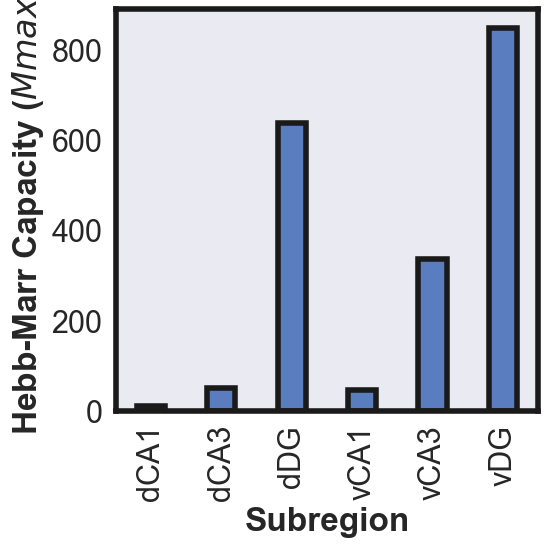

In [25]:
# What is the storage capacity of a Hebb-Marr memory, given each region's sparsity?
capacity_df = pd.DataFrame(data=np.zeros([6, 2]), columns=["Region", "Mmax"])
for i, (region, pole) in enumerate(regions_poles):
  a = labels_df[np.logical_and(labels_df["Region"] == region, labels_df["Axis"] == pole)]["Sparsity"].to_numpy().mean()
  Mmax = np.log(0.5) / np.log(1-a**2)
  if pole == "Dorsal":
    capacity_df.iloc[i] = np.hstack(("d"+region, Mmax))
  elif pole == "Ventral":
    capacity_df.iloc[i] = np.hstack(("v"+region, Mmax))
capacity_df["Mmax"] = capacity_df["Mmax"].astype(float)

sns.set(style="dark", font_scale=2., palette="muted")
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.barplot(data=capacity_df, y="Mmax", x="Region", width=0.4, edgecolor="k",
            linewidth=4., color="b")
ax.set_ylabel("Hebb-Marr Capacity ($Mmax$)", weight="bold")
ax.set_xticklabels(list(capacity_df["Region"]), rotation=90)
ax.set_xlabel("Subregion", weight="bold")
plt.setp(ax.spines.values(), linewidth=4., color="k")
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(dpath, "figures", "HebbMarrCapacity.svg"))
fig.savefig(os.path.join(dpath, "figures", "HebbMarrCapacity.png"),dpi=300)